In [47]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

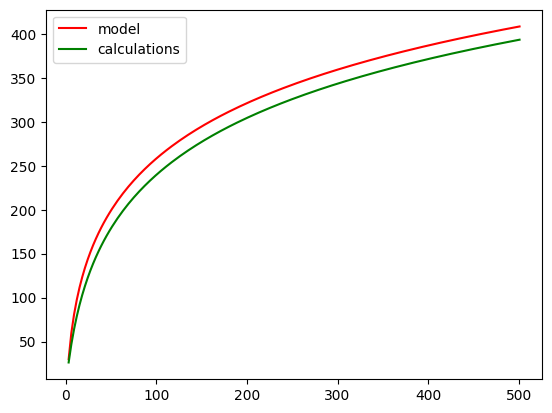

In [66]:
time = 0
pos = 0
speed = 10
acc = 0
k = 0.01
dt = 3

data_pos = np.array(np.empty([0]))
data_time = np.array(np.empty([0]))

data_pos_diffur = np.array(np.empty([0]))
data_time_diffur = np.array(np.empty([0]))

def x(t):
    return (math.log(0.01 * t + 0.1))/0.01 + 100* math.log(10)

while True:
    screen = np.full((500, 1000, 3), 1, dtype=np.float32)
    time += dt
    pos += speed * dt
    speed += acc * dt
    
    screen = cv2.circle(screen, (max(0, min(999, int(pos))), 250), 5, (1, 0.4, 0.4), 10)
    
    acc = -k * speed**2
    
    data_pos = np.append(data_pos, pos)
    data_time = np.append(data_time, time)
    
    data_pos_diffur = np.append(data_pos_diffur, x(time))
    data_time_diffur = np.append(data_time_diffur, time)
    
    if (time >= 500):
        break
    
    cv2.imshow('screen', screen)
    if cv2.waitKey(1) == ord('q'):
        break

cv2.destroyAllWindows()



plt.plot(data_time, data_pos, color='r', label='model')
plt.plot(data_time_diffur, data_pos_diffur, color='g', label='calculations')
plt.legend()
plt.show()